# Classification of datasets using the Random Forest algorithm

In [1]:
import pandas as pd
from sklearn.datasets import fetch_covtype

# Load data
data = fetch_covtype()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# View previous lines
print(df.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     2596.0    51.0    3.0                             258.0   
1     2590.0    56.0    2.0                             212.0   
2     2804.0   139.0    9.0                             268.0   
3     2785.0   155.0   18.0                             242.0   
4     2595.0    45.0    2.0                             153.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             0.0                            510.0   
1                            -6.0                            390.0   
2                            65.0                           3180.0   
3                           118.0                           3090.0   
4                            -1.0                            391.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          221.0           232.0          148.0   
1          220.0           235.0          151.0   
2          234.0           238.0   

In [2]:
# Input features
X = data.data

# tags, minus 1 to make it start from 0
y = data.target - 1  

In [3]:
# Divide the dataset into a training set and a test set
from sklearn.model_selection import train_test_split

# X is the features and y is the classification label corresponding to those features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
# Extract the last two samples and their corresponding labels as future samples
futureSample_X = X_test[-2:]
futureSample_y = y_test[-2:]

# Remove the last two samples and labels, and update x_test and y_test to not include these two future samples.
X_test = X_test[:-2]
y_test = y_test[:-2]

In [9]:
# Using the RandomForestClassifier to create and train a random forest model
from sklearn.ensemble import RandomForestClassifier

# n_estimators=100: indicates that the number of trees in the forest is 100.
# criterion=‘entropy’: indicates that the criterion for splitting each tree is to use information gain (entropy).
model = RandomForestClassifier(n_estimators=100, criterion='entropy')
#Train the model using the training data X_train and the labels y_train so that the model can make classification predictions based on the data.
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [10]:
# Import packages for evaluating a classification model
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score

In [11]:
# Returns the model's prediction category for each sample in the X_test, i.e. the prediction label to which each sample belongs.
y_pred = model.predict(X_test)

In [12]:
# Use the accuracy_score function to calculate the accuracy of model predictions
accuracy_test = accuracy_score(y_test, y_pred)
print (accuracy_test)

0.9571604375177494


In [13]:
# Use the precision_score function to calculate the weighted average precision of the model
precision_test = metrics.precision_score(y_test, y_pred, average='weighted')
print (precision_test)

0.9572197950962931


In [14]:
# Calculate the weighted average F1 score for the model
f1_test = metrics.f1_score(y_test, y_pred, average='weighted')
print(f1_test)

0.9569581660884915


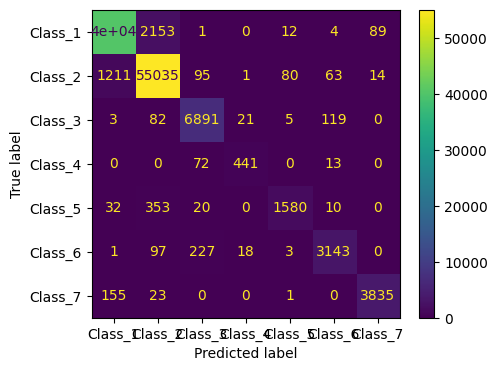

In [16]:
# Demonstrate the confusion matrix
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Demonstration of the confusion matrix using category labels for the forest cover type dataset
cmp = ConfusionMatrixDisplay(cm, display_labels=["Class_1", "Class_2", "Class_3", "Class_4", "Class_5", "Class_6", "Class_7"])

# Drawing the confusion matrix
cmp.plot(ax=ax)
plt.show()

In [17]:
# Generate a classification report with precision, recall, F1-score and support for each category.
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     42557
           1       0.95      0.97      0.96     56499
           2       0.94      0.97      0.96      7121
           3       0.92      0.84      0.88       526
           4       0.94      0.79      0.86      1995
           5       0.94      0.90      0.92      3489
           6       0.97      0.96      0.96      4014

    accuracy                           0.96    116201
   macro avg       0.95      0.91      0.93    116201
weighted avg       0.96      0.96      0.96    116201



In [18]:
# Prediction of future samples futureSample_X using the trained model model
solution_validate = model.predict(futureSample_X)

In [19]:
# Calculate the accuracy between the predicted results and the true labels of future samples
score_validate = accuracy_score(solution_validate, futureSample_y)
print (score_validate)

1.0
